<a href="https://colab.research.google.com/github/DAVIAMERICO242/GradientBoostingPredictionInterval/blob/main/Gradient_Boosting_prediction_interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Using Gradient Boosting to make predict intervals**

<p align="justify">Here we focus on how constructing a non parametric predict interval by using Gradient Boosting algorithm, a predict interval often seeks to bound a prediction for a response in a regression or classification (by probabilites) problem, a prediction interval bounds the response of a specific observation from the predictors vector, it often depends from the input variables evaluation regarding the such observation, that's given a p-dimensional observation from the predictors as $\mathbf{x} =(x_1,...,x_p)$ regarding some response $y=f(\mathbf{x})$ we want to model a interval which $P(L(\mathbf{x}) \leq f(\mathbf{x}) \leq U(\mathbf{x}))=1-\alpha$ where $\alpha$ is the significancy that's we are seeking an interval which tells us about where the true function $f$ evaluated at $\mathbf{x}$ would lie. We're using quantilic regression to estimate $L(\mathbf{x})$ and $U(\mathbf{x})$ since the quantiles regarding $\alpha/2$ and $1-\alpha/2$ bounds an area of $1-\alpha$ into, those estimations will be made by Gradient Boosting quantile regression and the estimated quantiles, in our code, won't even depend from our estimator for the true function (althought the math apparently assumes the true response is as a Gradient Boosting model it doesn't seem get us any problem here), so we can model the true function $f(\mathbf{x})$ by a model unlike Gradient Boosting. Since we're regarding quantile estimators the probability may not cover exactly $1-\alpha$ of mass. Below we're generating the data from our true function, as $f(x)=sin(x)+x^{3}+e$ where $e\sim Laplace(scale=5)$, and plotting the response regarding the training set and the true function without its noise.


</p>

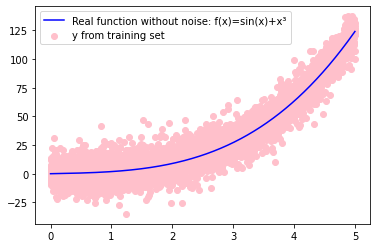

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
x=np.linspace(0,5,10000)
y=np.sin(x)+x**3+np.random.laplace(scale=5,size=10000)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=55)

def f(x):
    return np.sin(x)+x**3

plt.scatter(x_train,y_train,color='pink',label='y from training set')
plt.plot(x,f(x),label='Real function without noise: f(x)=sin(x)+x³',color='blue')
plt.legend()


Below we're fitting a MultilayerPerceptronRegressor to the training data and plotting it over all data regarding $x$ (just to use the range of $x$) and comparing to the real function without its noise:

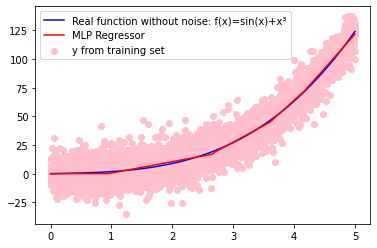

In [46]:
plt.scatter(x_train,y_train,color='pink',label='y from training set')
plt.plot(x,f(x),label='Real function without noise: f(x)=sin(x)+x³',color='blue')
m=MLPRegressor(hidden_layer_sizes=(200,8)).fit(x_train.reshape(-1,1),y_train)
plt.plot(x,m.predict(x.reshape(-1,1)),color='red',label='MLP Regressor')
plt.legend()

Now we're fitting the lower and upper bounds $\left(L(\mathbf{x}),U(\mathbf{x})\right)$ and plotting them over all $x$ data:

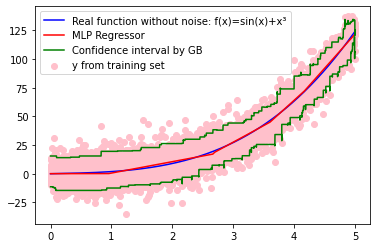

In [47]:
L_hat=GradientBoostingRegressor(loss='quantile',alpha=0.025).fit(x_train.reshape(-1,1),y_train)
U_hat=GradientBoostingRegressor(loss='quantile',alpha=0.975).fit(x_train.reshape(-1,1),y_train)
plt.scatter(x_train,y_train,color='pink',label='y from training set')
plt.plot(x,f(x),label='Real function without noise: f(x)=sin(x)+x³',color='blue')
plt.plot(x,m.predict(x.reshape(-1,1)),color='red',label='MLP Regressor')
plt.plot(x,L_hat.predict(x.reshape(-1,1)),color='green',label='Confidence interval by GB')
plt.plot(x,U_hat.predict(x.reshape(-1,1)),color='green')
plt.legend()

Now we're evaluating the coverage rate of our estimated interval on the test data.

In [48]:
y_test=pd.DataFrame(y_test)
L_hat_test=pd.DataFrame(L_hat.predict(x_test.reshape(-1,1)))
U_hat_test=pd.DataFrame(U_hat.predict(x_test.reshape(-1,1)))
d=pd.concat([y_test,L_hat_test,U_hat_test],axis=1)
d.columns=['y_test','L_hat_test','U_hat_test']
p_chap=d['y_test'].between(d['L_hat_test'],d['U_hat_test']).sum()/len(d)
print(p_chap)

0.955
